In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/customer_churn_data.csv')
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [6]:
df.isna().sum() #checking for missing values

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [7]:
df["InternetService"] = df["InternetService"].fillna

In [8]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [9]:
df.duplicated().sum() #checking for duplicate values

np.int64(0)

In [10]:
num_cols_data = df.select_dtypes(include=['int64', 'float64'])
num_cols_data.head(10)

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
5,6,42,16,119.75,1916.00
6,7,60,14,80.32,1124.48
7,8,52,6,58.90,353.40
8,9,40,53,49.81,2639.93
9,10,50,10,61.55,615.50


In [11]:
num_cols_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [12]:
df["Churn"].value_counts() #checking for class imbalance

Churn
Yes    883
No     117
Name: count, dtype: int64

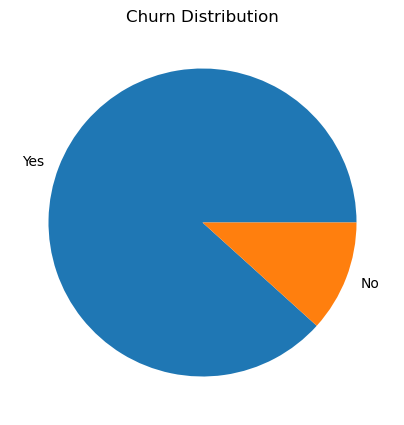

In [13]:
df["Churn"].value_counts().plot(kind='pie', figsize=(5,5))
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()

In [14]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

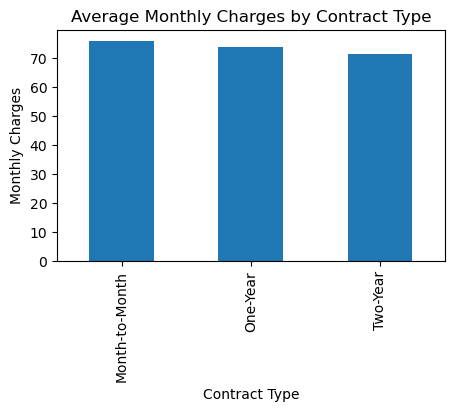

In [15]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind='bar', figsize=(5,3))
plt.title("Average Monthly Charges by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Monthly Charges")
plt.show()

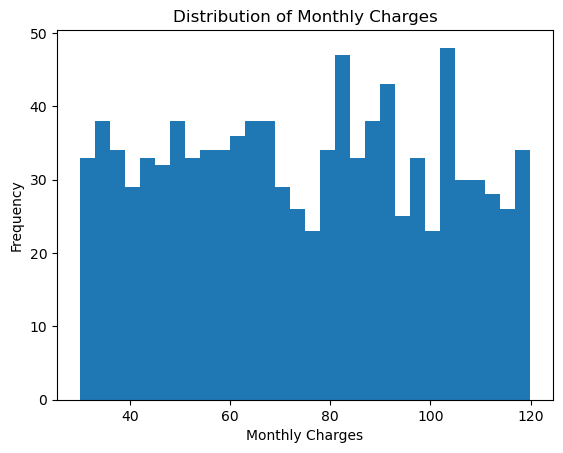

In [16]:
plt.hist(df["MonthlyCharges"], bins=30)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

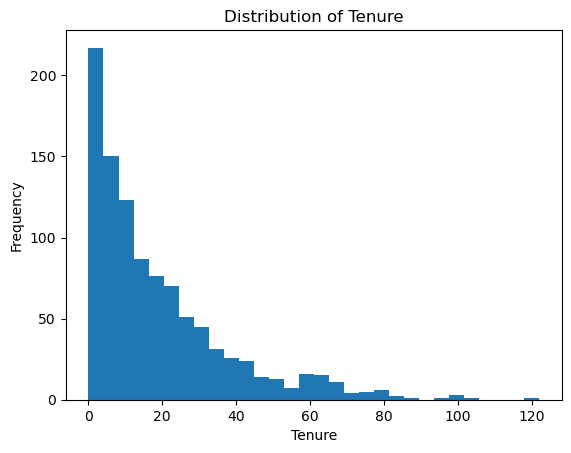

In [17]:
plt.hist(df["Tenure"], bins=30, )
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

In [18]:
y = df[["Churn"]]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [19]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0) # 0 for Male & 1 for Female

C:\Users\visha\AppData\Local\Temp\ipykernel_19096\1849563953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0) # 0 for Male & 1 for Female


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [25]:
X_test = scaler.fit_transform(X_test)

In [30]:
from sklearn.metrics import accuracy_score

def modelperf(preds):
    print("\nModel Accuracy: ", accuracy_score(y_test, preds))

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
y_preds = logreg.predict(X_test)

In [40]:
modelperf(y_preds)


Model Accuracy:  0.885


In [41]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}


In [42]:
gridknn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridknn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [43]:
gridknn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [49]:
y_preds2 = gridknn.predict(X_test)
modelperf(y_preds2)


Model Accuracy:  0.88


In [50]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [51]:
gridsvc = GridSearchCV(SVC(), param_grid, cv=5)
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [52]:
gridsvc.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [53]:
y_preds3 = gridsvc.predict(X_test)
modelperf(y_preds3)


Model Accuracy:  0.885


In [54]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
gridtree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
gridtree.fit(X_train, y_train)
gridtree.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [55]:
y_preds4 = gridtree.predict(X_test)
modelperf(y_preds4)


Model Accuracy:  0.88


In [57]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}
gridforest = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
gridforest.fit(X_train, y_train)
gridforest.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 200}

In [58]:
y_preds5 = gridforest.predict(X_test)
modelperf(y_preds5)


Model Accuracy:  0.885


In [60]:
best_model = gridsvc.best_estimator_
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [61]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')